# Sensitivity Analysis: metric for parameters

In order to systematically probe a parameter's sensitivity, its partial derivative wrt the distance is calculated, and its range at 2.5, 5, 10 and 25% (for example) of the final parameter are averaged to get a final metric

 ## First, let's generate the data, just having k1 as a parameter:

In [2]:
import numpy as np
from tabulate import tabulate
import matplotlib.pyplot as plt
from scipy.integrate import odeint

#Distance function
def euclidean_distance_multiple_trajectories(observed_trajectories, simulated_trajectories):
    num_trajectories = len(observed_trajectories)
    total_distance = 0.0

    for i in range(num_trajectories):
        observed_data = observed_trajectories[i]
        simulated_data = simulated_trajectories[i]

        # Calculate the Euclidean distance between observed and simulated data
        euclidean_distance = np.linalg.norm(observed_data - simulated_data)

        # Accumulate the distances
        total_distance += euclidean_distance

    # Average the distances over all trajectories
    average_distance = total_distance / num_trajectories

    return average_distance

In [3]:
def model(variables, t, params):

    m1, p1, m2, p2, m3, p3 = variables
    k1 = params
    k2 = 246.96291990024542
    k3 = 246.96291990024542
    a1 = 24.78485282457379
    a2 = 24.78485282457379
    a3 = 24.78485282457379
    g1 = 0.024884149937163258
    g2 = 0.024884149937163258
    g3 = 0.024884149937163258
    n1 = 5
    n2 = 5
    n3 = 5
    b1 = 33.82307682700831
    b2 = 33.82307682700831
    b3 = 33.82307682700831
    dm1 = 1.143402097500176
    dm2 = 1.143402097500176
    dm3 = 1.143402097500176
    dp1 = 0.7833664565550977
    dp2 = 0.7833664565550977
    dp3 = 0.7833664565550977

    dm1dt = -dm1 * m1 + (a1 / (1 + ((1/k1) * p2) ** n1)) + g1
    dp1dt = (b1 * m1) - (dp1 * p1)
    dm2dt = -dm2 * m2 + (a2 / (1 + ((1/k2) * p3) ** n2)) + g2
    dp2dt = (b2 * m2) - (dp2 * p2)
    dm3dt = -dm3 * m3 + (a3 / (1 + ((1/k3) * p1) ** n3)) + g3
    dp3dt = (b3 * m3) - (dp3 * p3)
    
    return [dm1dt, dp1dt, dm2dt, dp2dt, dm3dt, dp3dt]

true_params = np.array([
    246.96291990024542  # first set of odes
])

def solve_ode(params, t):
    initial_conditions = np.array([0, 1, 0, 3, 0, 2])
    solution = odeint(model, initial_conditions, t, args=(params,))
    return solution

num_timesteps = 1000  # Number of time steps for simulation
t = np.linspace(0, 100, num_timesteps)
true_data = solve_ode(true_params, t)
true_data

array([[  0.        ,   1.        ,   0.        ,   3.        ,
          0.        ,   2.        ],
       [  2.34660602,   4.86804399,   2.34660602,   6.71720517,
          2.34660602,   5.79262458],
       [  4.43943119,  15.65925938,   4.43943145,  17.36895814,
          4.43943165,  16.51410904],
       ...,
       [  0.944322  ,  34.6692896 ,   1.98221468, 357.99272038,
         21.07125846, 746.84385659],
       [  1.20635185,  35.54360348,   1.77904851, 337.10669668,
         21.13892285, 759.2464713 ],
       [  1.54252981,  37.32367539,   1.59718204, 317.17006824,
         21.19924182, 770.92168979]])

Text(0.5, 0, 'k1')

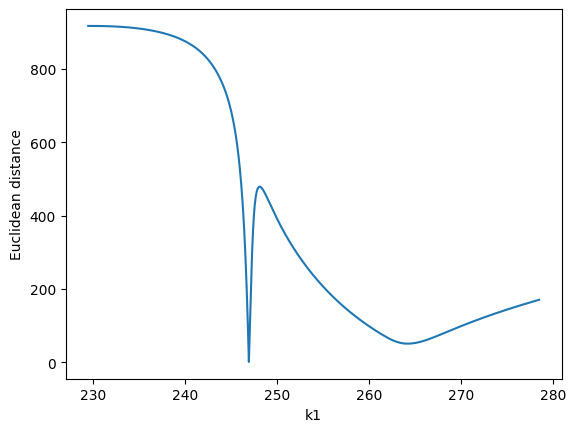

In [5]:
datapoints = 1000
k1_seq = np.linspace(229.5, 278.5, datapoints)
D_k1 = []
k1_collect = []
for i in range(np.size(k1_seq)):
    k1params = np.array([k1_seq[i]])
    k1_collect.append(k1params)
    data_k1 = solve_ode(k1params, t)
    dist = euclidean_distance_multiple_trajectories(true_data, data_k1)
    D_k1.append(dist)

plt.plot(k1_seq, D_k1)
plt.ylabel("Euclidean distance")
plt.xlabel("k1")

## We now calculate the metric by obtaining the derivative of the distance wrt the parameter

In [6]:
import numpy as np
from tabulate import tabulate
import matplotlib.pyplot as plt
from scipy.integrate import odeint

def model(variables, t, params):

    m1, p1, m2, p2, m3, p3 = variables
    k1, k2, k3, a1, a2, a3, g1, g2, g3, n1, n2, n3, b1, b2, b3, dm1, dm2, dm3, dp1, dp2, dp3 = params

    dm1dt = -dm1 * m1 + (a1 / (1 + ((1/k1) * p2) ** n1)) + g1
    dp1dt = (b1 * m1) - (dp1 * p1)
    dm2dt = -dm2 * m2 + (a2 / (1 + ((1/k2) * p3) ** n2)) + g2
    dp2dt = (b2 * m2) - (dp2 * p2)
    dm3dt = -dm3 * m3 + (a3 / (1 + ((1/k3) * p1) ** n3)) + g3
    dp3dt = (b3 * m3) - (dp3 * p3)
    
    return [dm1dt, dp1dt, dm2dt, dp2dt, dm3dt, dp3dt]

true_params = np.array([
    246.96291990024542, 246.96291990024542, 246.96291990024542,
    24.78485282457379, 24.78485282457379, 24.78485282457379,
    0.024884149937163258, 0.024884149937163258, 0.024884149937163258,
    5, 5, 5,
    33.82307682700831, 33.82307682700831, 33.82307682700831,
    1.143402097500176, 1.143402097500176, 1.143402097500176,
    0.7833664565550977, 0.7833664565550977, 0.7833664565550977
])

def solve_ode(params, t):
    initial_conditions = np.array([0, 1, 0, 3, 0, 2])
    solution = odeint(model, initial_conditions, t, args=(params,))
    return solution

num_timesteps = 1000  # Number of time steps for simulation
t = np.linspace(0, 100, num_timesteps)
true_data = solve_ode(true_params, t)
true_data

array([[  0.        ,   1.        ,   0.        ,   3.        ,
          0.        ,   2.        ],
       [  2.34660602,   4.86804399,   2.34660602,   6.71720517,
          2.34660602,   5.79262458],
       [  4.43943119,  15.65925938,   4.43943145,  17.36895814,
          4.43943165,  16.51410904],
       ...,
       [  0.944322  ,  34.6692896 ,   1.98221468, 357.99272038,
         21.07125846, 746.84385659],
       [  1.20635185,  35.54360348,   1.77904851, 337.10669668,
         21.13892285, 759.2464713 ],
       [  1.54252981,  37.32367539,   1.59718204, 317.17006824,
         21.19924182, 770.92168979]])

# Full sensitivity analysis for k

In [14]:
#To get index of the minimum D:
def min_val_ind(arr_y):
    target_value = min(arr_y)
    indices = np.where(arr_y == target_value)[0]
    
    if indices.size > 0:
        return indices

#The only thing we need to change is where the parameter is in param space! And distance function if we want!

def plots_sensitivity():
    datapoints = 1000 # How many steps in parameter space we have taken
    p_seq = np.linspace(229.5, 278.5, datapoints) #Change depending on parameter
    D_p = []
    p_collect = []
    for i in range(np.size(p_seq)):
        ########################################
        p_params = np.array([
                    p_seq[i], 246.96291990024542, 246.96291990024542,
                    24.78485282457379, 24.78485282457379, 24.78485282457379,
                    0.024884149937163258, 0.024884149937163258, 0.024884149937163258,
                    5, 5, 5,
                    33.82307682700831, 33.82307682700831, 33.82307682700831,
                    1.143402097500176, 1.143402097500176, 1.143402097500176,
                    0.7833664565550977, 0.7833664565550977, 0.7833664565550977
                    ]) #Need to change this! In this case k1
        ########################################
        p_collect.append(p_params)
        data_p = solve_ode(p_params, t)
        dist = euclidean_distance_multiple_trajectories(true_data, data_p) #Can also change the distance function
        D_p.append(dist)

    step_size = np.array([100,500,1000]) #Steps to take right and left, the higher 
                                        #the number, the closer to the true value, here 1%, 0.1%, 0.02% of true value

    #To get indices we sample:
    indices_array = []
    for i in step_size:
        indices_array.append(np.array([datapoints//i, -datapoints//i])) #How many steps do we record?

    #To get the ks that correspond to the indices we sample, and create useful arrays:
    min_ind = int(min_val_ind(D_p))
    global lowestD_p
    lowestD_p = p_seq[min_ind]
    global lowestD
    lowestD = D_p[min_ind]
    p_array = np.array([p_seq, D_p])
    grad = np.gradient(p_array) #Could also do np.diff, same result
    dDdp = grad[1][1]
    array_p_eval = []
    array_D_eval = []
    dD_array = []
    for i in indices_array:
        upperp = min_ind + i[0]
        lowerp = min_ind - i[0]
        array_p_eval.append(np.array([p_seq[int(upperp)], p_seq[int(lowerp)]])) #Save parameters
        array_D_eval.append(np.array([D_p[int(upperp)], D_p[int(lowerp)]])) #Same for distance
        dD_array.append(np.array([dDdp[int(upperp)], dDdp[int(lowerp)]])) #Same for derivative

    
    fig, axs = plt.subplots(1, 2, figsize=(12, 8))
    axs = axs.flatten()
    axs[0].plot(p_seq, D_p)
    axs[0].set_ylabel("Euclidean distance")
    axs[0].set_xlabel("p")
    axs[1].plot(p_seq, dDdp)
    axs[1].set_ylabel("dD/dp")
    axs[1].set_xlabel("p")

    return p_seq, D_p, dDdp, array_p_eval, array_D_eval #It returns where it is being evaluated!

def calc_sens_metric(array_p_eval, array_D_eval):
    p_raw = []
    D_raw = []
    for i in array_p_eval:  # Get raw arrays for metric calculation
        p_raw.append(i[0])
        p_raw.append(i[1])
    for i in array_D_eval:  # Get raw arrays for metric calculation
        D_raw.append(i[0])
        D_raw.append(i[1])
    deltaD = []
    deltap = []
    for p in p_raw:
        deltap.append(np.abs(p) - np.abs(lowestD_p))
    for D in D_raw:
        deltaD.append(np.abs(D) - np.abs(lowestD))
    metric = []
    for i in range(len(deltaD)):
        metric.append(np.abs(deltaD[i]) / np.abs(deltap[i]))
    result_sense = np.log(np.mean(metric))
    return result_sense

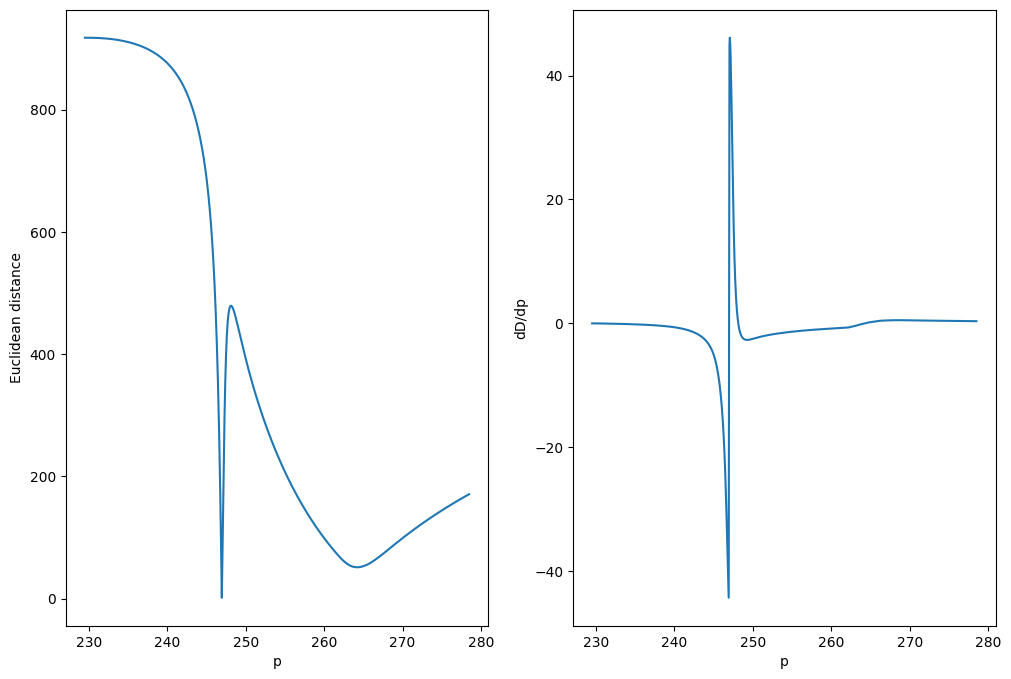

In [15]:
k_seq, D_k, dDdk, array_p_eval_k, array_D_eval_k = plots_sensitivity()

In [9]:
calc_sens_metric(array_p_eval_k, array_D_eval_k)

6.379670957527228

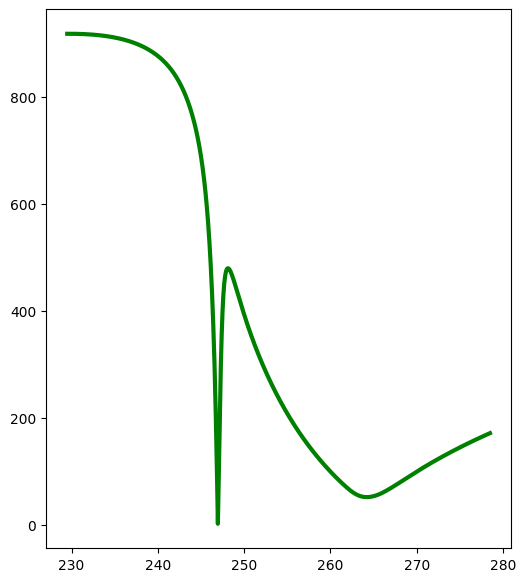

In [12]:
fig, ax = plt.subplots(figsize=(6,7))
ax.plot(k_seq, D_k, color = "green", label = "k", linewidth = 3) 

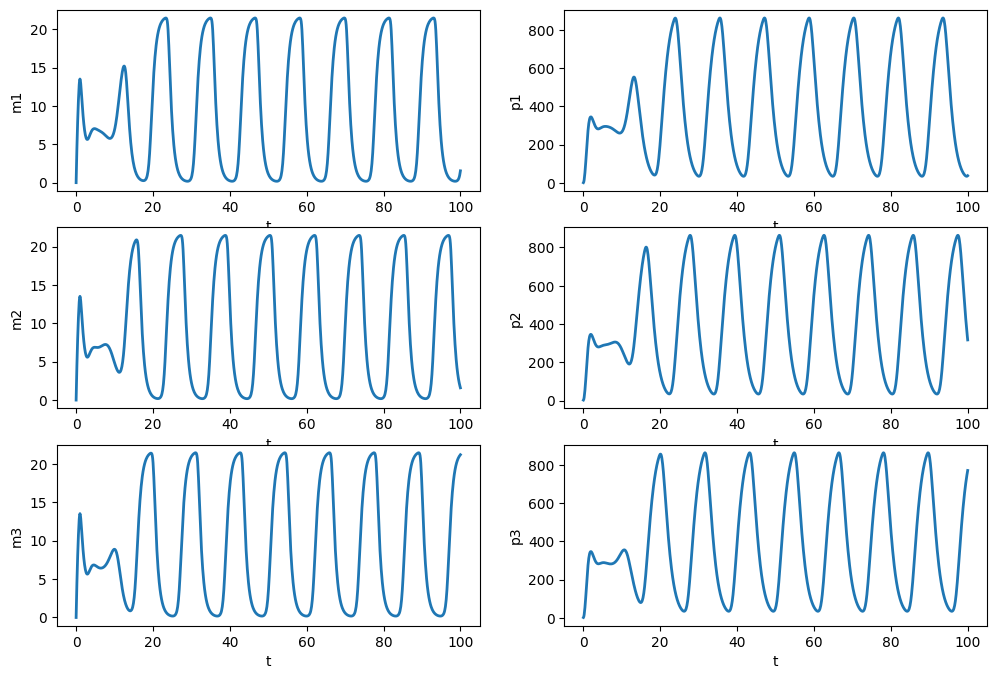

In [13]:
#Plot real trajectories for security
fig, axs = plt.subplots(3, 2, figsize=(12, 8))
axs = axs.flatten()

variable_labels = ['m1', 'p1', 'm2', 'p2', 'm3', 'p3']
for i in range(6):
    axs[i].plot(t, true_data[:, i], label='True Data', linewidth=2)
    axs[i].set_xlabel('t')
    axs[i].set_ylabel(variable_labels[i])

## Do with a

In [20]:
#The only thing we need to change is where the parameter is in param space! And distance function if we want!

def plots_sensitivity():
    datapoints = 1000 # How many steps in parameter space we have taken
    p_seq = np.linspace(22.3, 27.26, datapoints) #Change depending on parameter, 10%
    D_p = []
    p_collect = []
    for i in range(np.size(p_seq)):
        ########################################
        p_params = np.array([
                    246.96291990024542, 246.96291990024542, 246.96291990024542,
                    p_seq[i], 24.78485282457379, 24.78485282457379,
                    0.024884149937163258, 0.024884149937163258, 0.024884149937163258,
                    5, 5, 5,
                    33.82307682700831, 33.82307682700831, 33.82307682700831,
                    1.143402097500176, 1.143402097500176, 1.143402097500176,
                    0.7833664565550977, 0.7833664565550977, 0.7833664565550977
                    ]) #Need to change this! In this case k1
        ########################################
        p_collect.append(p_params)
        data_p = solve_ode(p_params, t)
        dist = euclidean_distance_multiple_trajectories(true_data, data_p) #Can also change the distance function
        D_p.append(dist)

    step_size = np.array([100,500,1000]) #Steps to take right and left, the higher 
                                        #the number, the closer to the true value, here 1%, 0.1%, 0.02% of true value

    #To get indices we sample:
    indices_array = []
    for i in step_size:
        indices_array.append(np.array([datapoints//i, -datapoints//i])) #How many steps do we record?

    #To get the ks that correspond to the indices we sample, and create useful arrays:
    min_ind = int(min_val_ind(D_p))
    global lowestD_p
    lowestD_p = p_seq[min_ind]
    global lowestD
    lowestD = D_p[min_ind]
    p_array = np.array([p_seq, D_p])
    grad = np.gradient(p_array) #Could also do np.diff, same result
    dDdp = grad[1][1]
    array_p_eval = []
    array_D_eval = []
    dD_array = []
    for i in indices_array:
        upperp = min_ind + i[0]
        lowerp = min_ind - i[0]
        array_p_eval.append(np.array([p_seq[int(upperp)], p_seq[int(lowerp)]])) #Save parameters
        array_D_eval.append(np.array([D_p[int(upperp)], D_p[int(lowerp)]])) #Same for distance
        dD_array.append(np.array([dDdp[int(upperp)], dDdp[int(lowerp)]])) #Same for derivative

    
    fig, axs = plt.subplots(1, 2, figsize=(12, 8))
    axs = axs.flatten()
    axs[0].plot(p_seq, D_p)
    axs[0].set_ylabel("Euclidean distance")
    axs[0].set_xlabel("p")
    axs[1].plot(p_seq, dDdp)
    axs[1].set_ylabel("dD/dp")
    axs[1].set_xlabel("p")

    return p_seq, D_p, dDdp, array_p_eval, array_D_eval #It returns where it is being evaluated!

def calc_sens_metric(array_p_eval, array_D_eval):
    p_raw = []
    D_raw = []
    for i in array_p_eval:  # Get raw arrays for metric calculation
        p_raw.append(i[0])
        p_raw.append(i[1])
    for i in array_D_eval:  # Get raw arrays for metric calculation
        D_raw.append(i[0])
        D_raw.append(i[1])
    deltaD = []
    deltap = []
    for p in p_raw:
        deltap.append(np.abs(p) - np.abs(lowestD_p))
    for D in D_raw:
        deltaD.append(np.abs(D) - np.abs(lowestD))
    metric = []
    for i in range(len(deltaD)):
        metric.append(np.abs(deltaD[i]) / np.abs(deltap[i]))
    result_sense = np.log(np.mean(metric))
    return result_sense

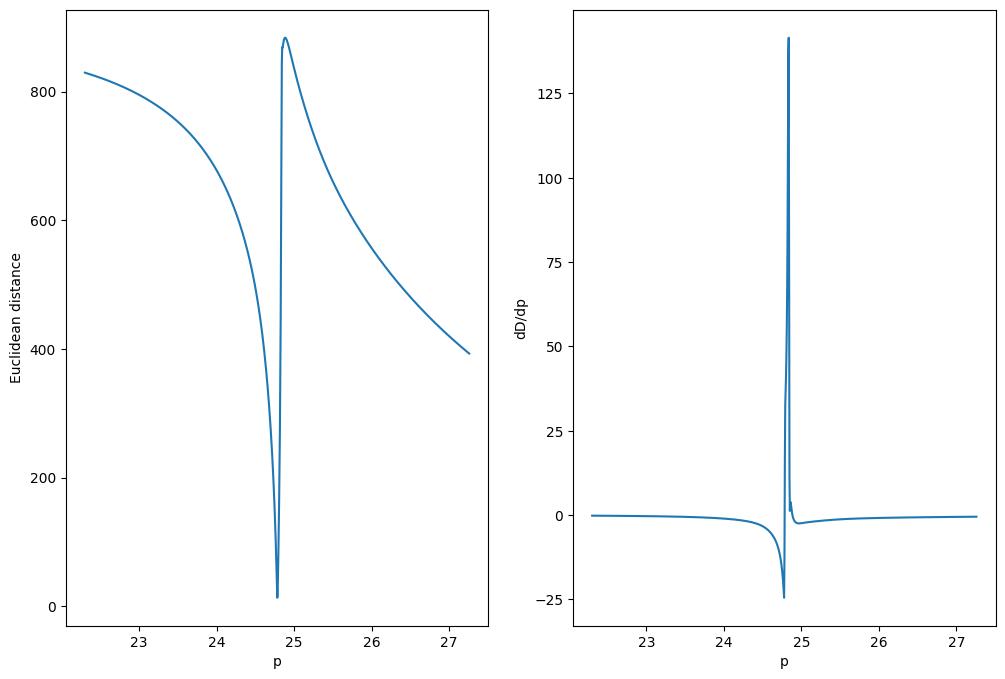

In [21]:
a_seq, D_a, dDda, array_p_eval_a, array_D_eval_a = plots_sensitivity()

In [22]:
calc_sens_metric(array_p_eval_a, array_D_eval_a)

8.46903672227541

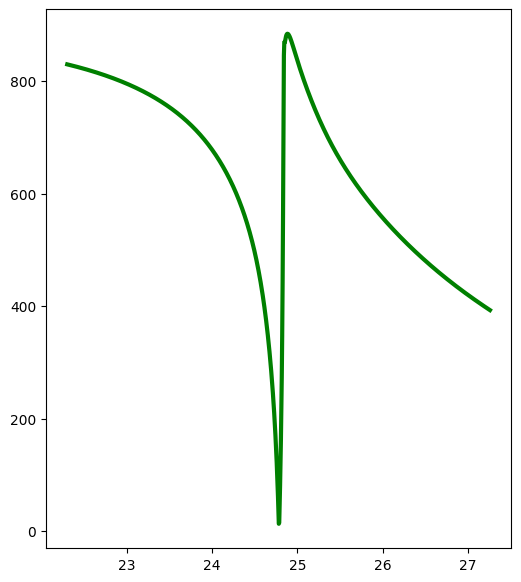

In [23]:
fig, ax = plt.subplots(figsize=(6,7))
ax.plot(a_seq, D_a, color = "green", label = "a", linewidth = 3) 

# Now do with g

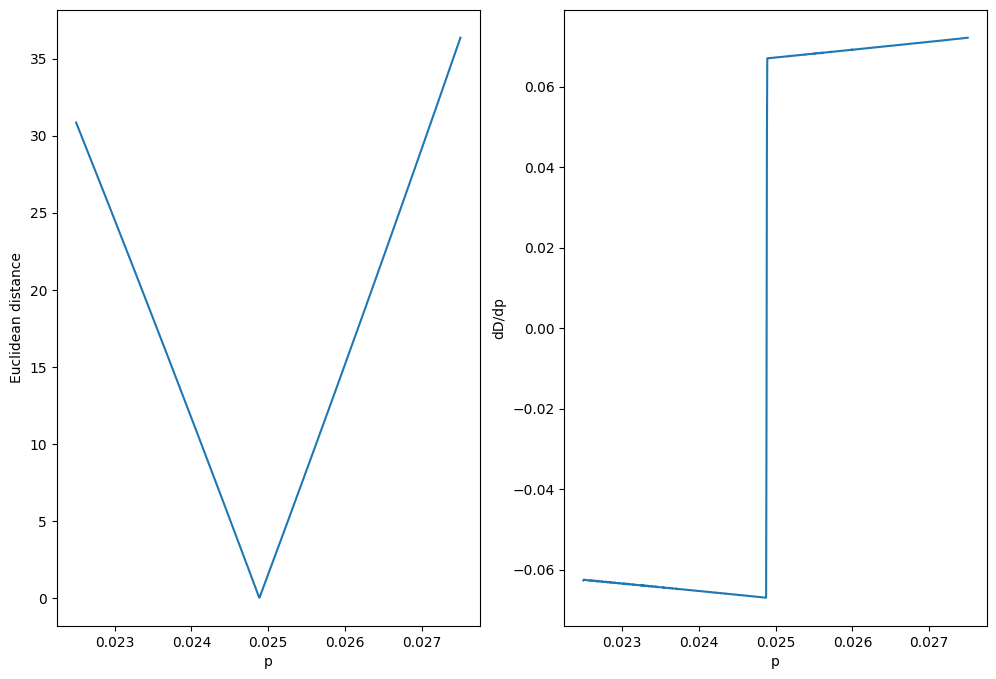

In [24]:
#The only thing we need to change is where the parameter is in param space! And distance function if we want!

def plots_sensitivity():
    datapoints = 1000 # How many steps in parameter space we have taken
    p_seq = np.linspace(0.0225, 0.0275, datapoints) #Change depending on parameter, 10%
    D_p = []
    p_collect = []
    for i in range(np.size(p_seq)):
        ########################################
        p_params = np.array([
                    246.96291990024542, 246.96291990024542, 246.96291990024542,
                    24.78485282457379, 24.78485282457379, 24.78485282457379,
                    p_seq[i], 0.024884149937163258, 0.024884149937163258,
                    5, 5, 5,
                    33.82307682700831, 33.82307682700831, 33.82307682700831,
                    1.143402097500176, 1.143402097500176, 1.143402097500176,
                    0.7833664565550977, 0.7833664565550977, 0.7833664565550977
                    ]) #Need to change this! In this case k1
        ########################################
        p_collect.append(p_params)
        data_p = solve_ode(p_params, t)
        dist = euclidean_distance_multiple_trajectories(true_data, data_p) #Can also change the distance function
        D_p.append(dist)

    step_size = np.array([100,500,1000]) #Steps to take right and left, the higher 
                                        #the number, the closer to the true value, here 1%, 0.1%, 0.02% of true value

    #To get indices we sample:
    indices_array = []
    for i in step_size:
        indices_array.append(np.array([datapoints//i, -datapoints//i])) #How many steps do we record?

    #To get the ks that correspond to the indices we sample, and create useful arrays:
    min_ind = int(min_val_ind(D_p))
    global lowestD_p
    lowestD_p = p_seq[min_ind]
    global lowestD
    lowestD = D_p[min_ind]
    p_array = np.array([p_seq, D_p])
    grad = np.gradient(p_array) #Could also do np.diff, same result
    dDdp = grad[1][1]
    array_p_eval = []
    array_D_eval = []
    dD_array = []
    for i in indices_array:
        upperp = min_ind + i[0]
        lowerp = min_ind - i[0]
        array_p_eval.append(np.array([p_seq[int(upperp)], p_seq[int(lowerp)]])) #Save parameters
        array_D_eval.append(np.array([D_p[int(upperp)], D_p[int(lowerp)]])) #Same for distance
        dD_array.append(np.array([dDdp[int(upperp)], dDdp[int(lowerp)]])) #Same for derivative

    
    fig, axs = plt.subplots(1, 2, figsize=(12, 8))
    axs = axs.flatten()
    axs[0].plot(p_seq, D_p)
    axs[0].set_ylabel("Euclidean distance")
    axs[0].set_xlabel("p")
    axs[1].plot(p_seq, dDdp)
    axs[1].set_ylabel("dD/dp")
    axs[1].set_xlabel("p")

    return p_seq, D_p, dDdp, array_p_eval, array_D_eval #It returns where it is being evaluated!

def calc_sens_metric(array_p_eval, array_D_eval):
    p_raw = []
    D_raw = []
    for i in array_p_eval:  # Get raw arrays for metric calculation
        p_raw.append(i[0])
        p_raw.append(i[1])
    for i in array_D_eval:  # Get raw arrays for metric calculation
        D_raw.append(i[0])
        D_raw.append(i[1])
    deltaD = []
    deltap = []
    for p in p_raw:
        deltap.append(np.abs(p) - np.abs(lowestD_p))
    for D in D_raw:
        deltaD.append(np.abs(D) - np.abs(lowestD))
    metric = []
    for i in range(len(deltaD)):
        metric.append(np.abs(deltaD[i]) / np.abs(deltap[i]))
    result_sense = np.log(np.mean(metric))
    return result_sense

g_seq, D_g, dDdg, array_p_eval_g, array_D_eval_g = plots_sensitivity()

In [25]:
calc_sens_metric(array_p_eval_g, array_D_eval_g)

9.293957274770273

Tricky because the scale is very small...

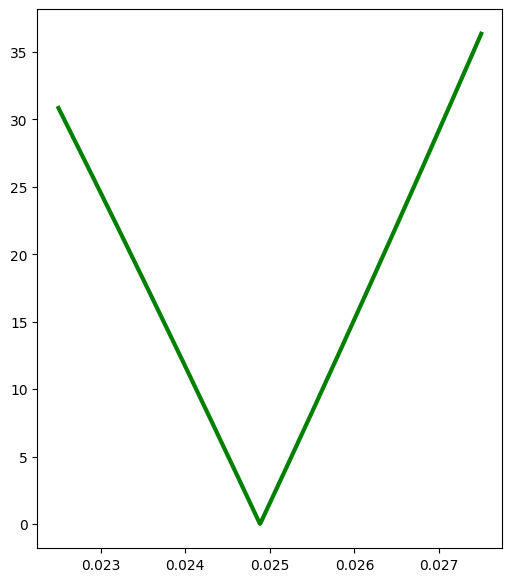

In [26]:
fig, ax = plt.subplots(figsize=(6,7))
ax.plot(g_seq, D_g, color = "green", label = "g", linewidth = 3) 

# Now do n

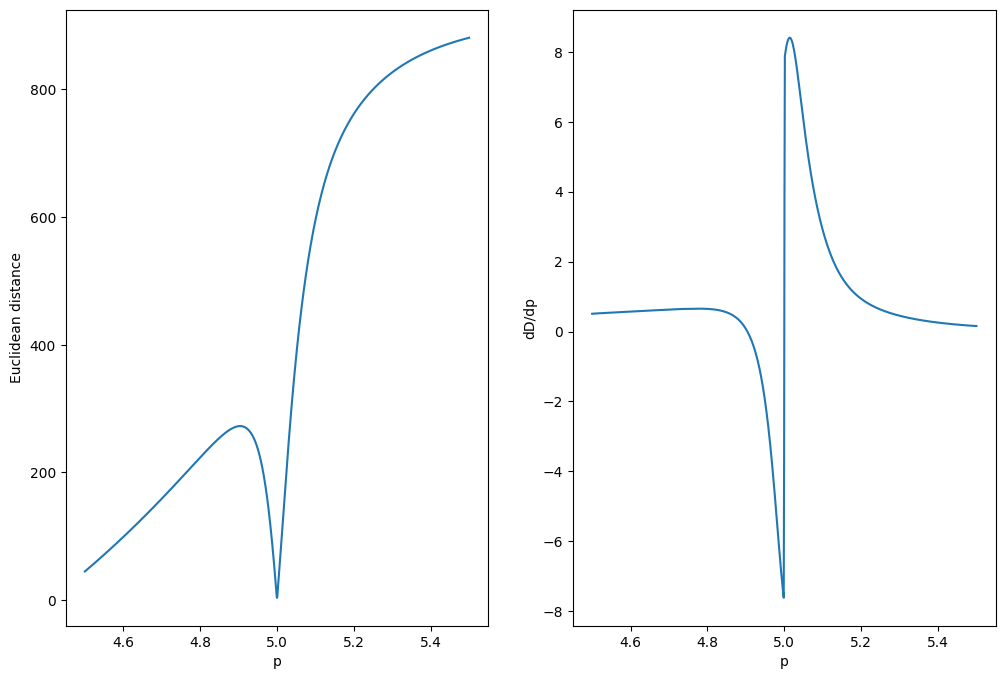

In [27]:
#The only thing we need to change is where the parameter is in param space! And distance function if we want!

def plots_sensitivity():
    datapoints = 1000 # How many steps in parameter space we have taken
    p_seq = np.linspace(4.5, 5.5, datapoints) #Change depending on parameter, 10%
    D_p = []
    p_collect = []
    for i in range(np.size(p_seq)):
        ########################################
        p_params = np.array([
                    246.96291990024542, 246.96291990024542, 246.96291990024542,
                    24.78485282457379, 24.78485282457379, 24.78485282457379,
                    0.024884149937163258, 0.024884149937163258, 0.024884149937163258,
                    p_seq[i], 5, 5,
                    33.82307682700831, 33.82307682700831, 33.82307682700831,
                    1.143402097500176, 1.143402097500176, 1.143402097500176,
                    0.7833664565550977, 0.7833664565550977, 0.7833664565550977
                    ]) #Need to change this! In this case k1
        ########################################
        p_collect.append(p_params)
        data_p = solve_ode(p_params, t)
        dist = euclidean_distance_multiple_trajectories(true_data, data_p) #Can also change the distance function
        D_p.append(dist)

    step_size = np.array([100,500,1000]) #Steps to take right and left, the higher 
                                        #the number, the closer to the true value, here 1%, 0.1%, 0.02% of true value

    #To get indices we sample:
    indices_array = []
    for i in step_size:
        indices_array.append(np.array([datapoints//i, -datapoints//i])) #How many steps do we record?

    #To get the ks that correspond to the indices we sample, and create useful arrays:
    min_ind = int(min_val_ind(D_p))
    global lowestD_p
    lowestD_p = p_seq[min_ind]
    global lowestD
    lowestD = D_p[min_ind]
    p_array = np.array([p_seq, D_p])
    grad = np.gradient(p_array) #Could also do np.diff, same result
    dDdp = grad[1][1]
    array_p_eval = []
    array_D_eval = []
    dD_array = []
    for i in indices_array:
        upperp = min_ind + i[0]
        lowerp = min_ind - i[0]
        array_p_eval.append(np.array([p_seq[int(upperp)], p_seq[int(lowerp)]])) #Save parameters
        array_D_eval.append(np.array([D_p[int(upperp)], D_p[int(lowerp)]])) #Same for distance
        dD_array.append(np.array([dDdp[int(upperp)], dDdp[int(lowerp)]])) #Same for derivative

    
    fig, axs = plt.subplots(1, 2, figsize=(12, 8))
    axs = axs.flatten()
    axs[0].plot(p_seq, D_p)
    axs[0].set_ylabel("Euclidean distance")
    axs[0].set_xlabel("p")
    axs[1].plot(p_seq, dDdp)
    axs[1].set_ylabel("dD/dp")
    axs[1].set_xlabel("p")

    return p_seq, D_p, dDdp, array_p_eval, array_D_eval #It returns where it is being evaluated!

def calc_sens_metric(array_p_eval, array_D_eval):
    p_raw = []
    D_raw = []
    for i in array_p_eval:  # Get raw arrays for metric calculation
        p_raw.append(i[0])
        p_raw.append(i[1])
    for i in array_D_eval:  # Get raw arrays for metric calculation
        D_raw.append(i[0])
        D_raw.append(i[1])
    deltaD = []
    deltap = []
    for p in p_raw:
        deltap.append(np.abs(p) - np.abs(lowestD_p))
    for D in D_raw:
        deltaD.append(np.abs(D) - np.abs(lowestD))
    metric = []
    for i in range(len(deltaD)):
        metric.append(np.abs(deltaD[i]) / np.abs(deltap[i]))
    result_sense = np.log(np.mean(metric))
    return result_sense

n_seq, D_n, dDdn, array_p_eval_n, array_D_eval_n = plots_sensitivity()

In [28]:
calc_sens_metric(array_p_eval_n, array_D_eval_n)

8.632855576634546

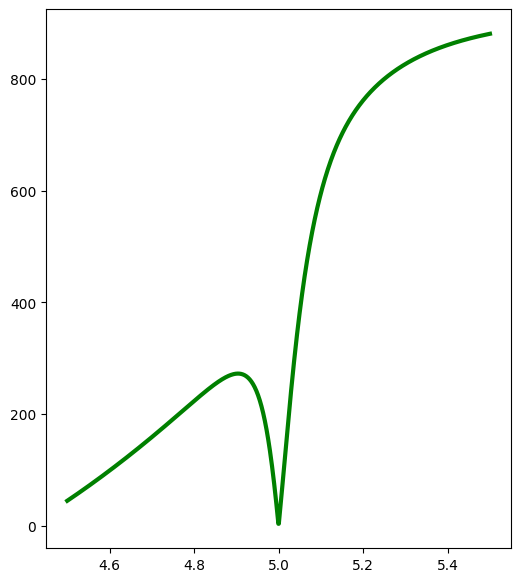

In [29]:
fig, ax = plt.subplots(figsize=(6,7))
ax.plot(n_seq, D_n, color = "green", label = "n", linewidth = 3) 

# Now try with b

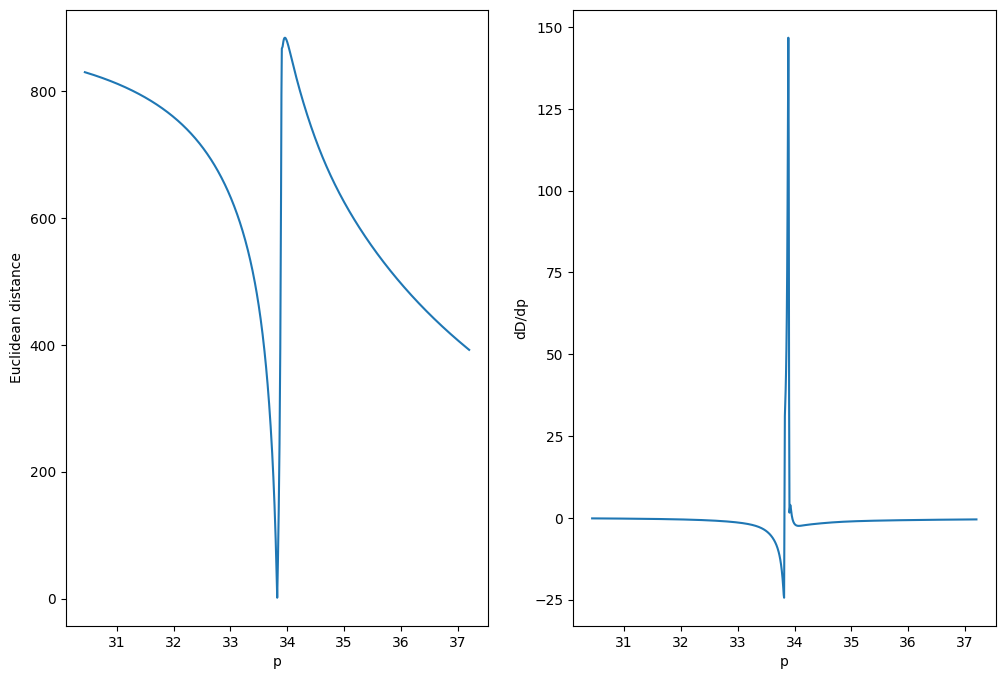

In [30]:
#The only thing we need to change is where the parameter is in param space! And distance function if we want!

def plots_sensitivity():
    datapoints = 1000 # How many steps in parameter space we have taken
    p_seq = np.linspace(30.44, 37.2, datapoints) #Change depending on parameter, 10%
    D_p = []
    p_collect = []
    for i in range(np.size(p_seq)):
        ########################################
        p_params = np.array([
                    246.96291990024542, 246.96291990024542, 246.96291990024542,
                    24.78485282457379, 24.78485282457379, 24.78485282457379,
                    0.024884149937163258, 0.024884149937163258, 0.024884149937163258,
                    5, 5, 5,
                    p_seq[i], 33.82307682700831, 33.82307682700831,
                    1.143402097500176, 1.143402097500176, 1.143402097500176,
                    0.7833664565550977, 0.7833664565550977, 0.7833664565550977
                    ]) #Need to change this! In this case k1
        ########################################
        p_collect.append(p_params)
        data_p = solve_ode(p_params, t)
        dist = euclidean_distance_multiple_trajectories(true_data, data_p) #Can also change the distance function
        D_p.append(dist)

    step_size = np.array([100,500,1000]) #Steps to take right and left, the higher 
                                        #the number, the closer to the true value, here 1%, 0.1%, 0.02% of true value

    #To get indices we sample:
    indices_array = []
    for i in step_size:
        indices_array.append(np.array([datapoints//i, -datapoints//i])) #How many steps do we record?

    #To get the ks that correspond to the indices we sample, and create useful arrays:
    min_ind = int(min_val_ind(D_p))
    global lowestD_p
    lowestD_p = p_seq[min_ind]
    global lowestD
    lowestD = D_p[min_ind]
    p_array = np.array([p_seq, D_p])
    grad = np.gradient(p_array) #Could also do np.diff, same result
    dDdp = grad[1][1]
    array_p_eval = []
    array_D_eval = []
    dD_array = []
    for i in indices_array:
        upperp = min_ind + i[0]
        lowerp = min_ind - i[0]
        array_p_eval.append(np.array([p_seq[int(upperp)], p_seq[int(lowerp)]])) #Save parameters
        array_D_eval.append(np.array([D_p[int(upperp)], D_p[int(lowerp)]])) #Same for distance
        dD_array.append(np.array([dDdp[int(upperp)], dDdp[int(lowerp)]])) #Same for derivative

    
    fig, axs = plt.subplots(1, 2, figsize=(12, 8))
    axs = axs.flatten()
    axs[0].plot(p_seq, D_p)
    axs[0].set_ylabel("Euclidean distance")
    axs[0].set_xlabel("p")
    axs[1].plot(p_seq, dDdp)
    axs[1].set_ylabel("dD/dp")
    axs[1].set_xlabel("p")

    return p_seq, D_p, dDdp, array_p_eval, array_D_eval #It returns where it is being evaluated!

def calc_sens_metric(array_p_eval, array_D_eval):
    p_raw = []
    D_raw = []
    for i in array_p_eval:  # Get raw arrays for metric calculation
        p_raw.append(i[0])
        p_raw.append(i[1])
    for i in array_D_eval:  # Get raw arrays for metric calculation
        D_raw.append(i[0])
        D_raw.append(i[1])
    deltaD = []
    deltap = []
    for p in p_raw:
        deltap.append(np.abs(p) - np.abs(lowestD_p))
    for D in D_raw:
        deltaD.append(np.abs(D) - np.abs(lowestD))
    metric = []
    for i in range(len(deltaD)):
        metric.append(np.abs(deltaD[i]) / np.abs(deltap[i]))
    result_sense = np.log(np.mean(metric))
    return result_sense

b_seq, D_b, dDdb, array_p_eval_b, array_D_eval_b = plots_sensitivity()

In [31]:
calc_sens_metric(array_p_eval_b, array_D_eval_b)

8.462948689964962

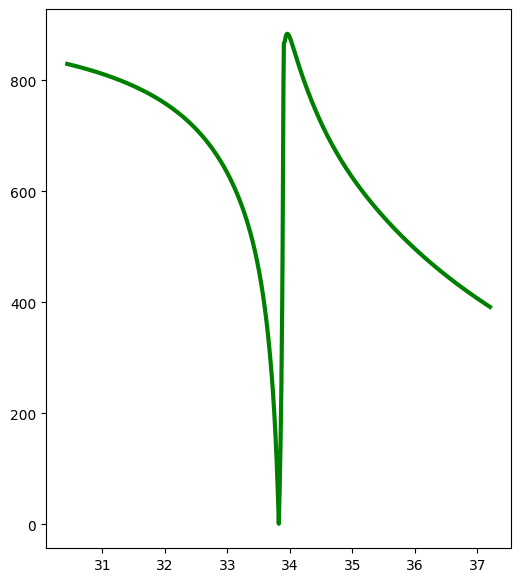

In [32]:
fig, ax = plt.subplots(figsize=(6,7))
ax.plot(b_seq, D_b, color = "green", label = "b", linewidth = 3) 

# Now try with dm1

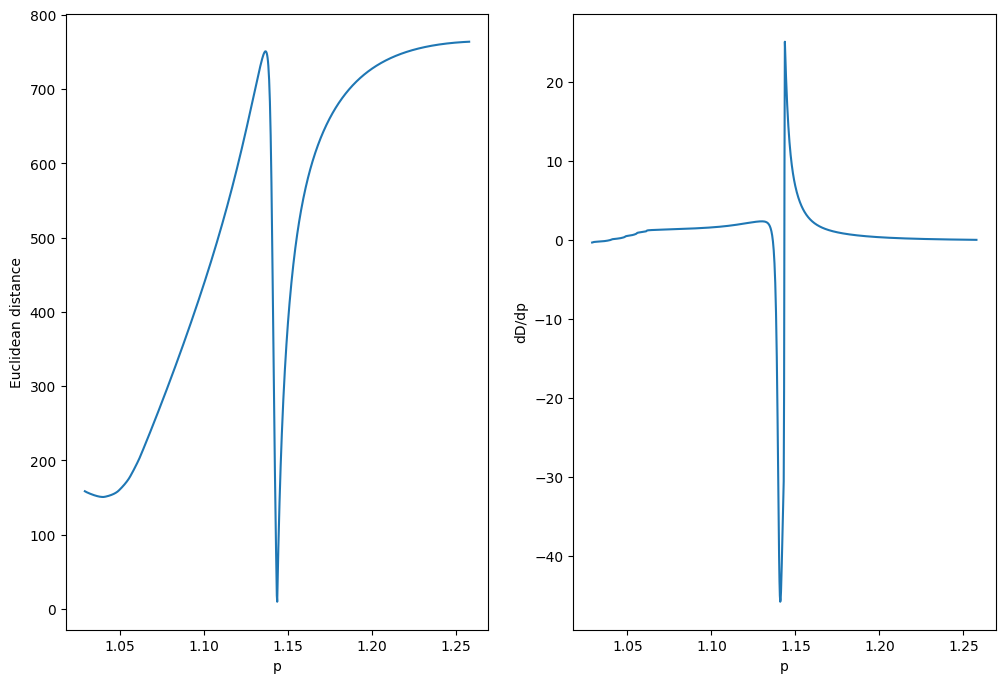

In [33]:
#The only thing we need to change is where the parameter is in param space! And distance function if we want!

def plots_sensitivity():
    datapoints = 1000 # How many steps in parameter space we have taken
    p_seq = np.linspace(1.029, 1.25774, datapoints) #Change depending on parameter, 10%
    D_p = []
    p_collect = []
    for i in range(np.size(p_seq)):
        ########################################
        p_params = np.array([
                    246.96291990024542, 246.96291990024542, 246.96291990024542,
                    24.78485282457379, 24.78485282457379, 24.78485282457379,
                    0.024884149937163258, 0.024884149937163258, 0.024884149937163258,
                    5, 5, 5,
                    33.82307682700831, 33.82307682700831, 33.82307682700831,
                    p_seq[i], 1.143402097500176, 1.143402097500176,
                    0.7833664565550977, 0.7833664565550977, 0.7833664565550977
                    ]) #Need to change this! In this case k1
        ########################################
        p_collect.append(p_params)
        data_p = solve_ode(p_params, t)
        dist = euclidean_distance_multiple_trajectories(true_data, data_p) #Can also change the distance function
        D_p.append(dist)

    step_size = np.array([100,500,1000]) #Steps to take right and left, the higher 
                                        #the number, the closer to the true value, here 1%, 0.1%, 0.02% of true value

    #To get indices we sample:
    indices_array = []
    for i in step_size:
        indices_array.append(np.array([datapoints//i, -datapoints//i])) #How many steps do we record?

    #To get the ks that correspond to the indices we sample, and create useful arrays:
    min_ind = int(min_val_ind(D_p))
    global lowestD_p
    lowestD_p = p_seq[min_ind]
    global lowestD
    lowestD = D_p[min_ind]
    p_array = np.array([p_seq, D_p])
    grad = np.gradient(p_array) #Could also do np.diff, same result
    dDdp = grad[1][1]
    array_p_eval = []
    array_D_eval = []
    dD_array = []
    for i in indices_array:
        upperp = min_ind + i[0]
        lowerp = min_ind - i[0]
        array_p_eval.append(np.array([p_seq[int(upperp)], p_seq[int(lowerp)]])) #Save parameters
        array_D_eval.append(np.array([D_p[int(upperp)], D_p[int(lowerp)]])) #Same for distance
        dD_array.append(np.array([dDdp[int(upperp)], dDdp[int(lowerp)]])) #Same for derivative

    
    fig, axs = plt.subplots(1, 2, figsize=(12, 8))
    axs = axs.flatten()
    axs[0].plot(p_seq, D_p)
    axs[0].set_ylabel("Euclidean distance")
    axs[0].set_xlabel("p")
    axs[1].plot(p_seq, dDdp)
    axs[1].set_ylabel("dD/dp")
    axs[1].set_xlabel("p")

    return p_seq, D_p, dDdp, array_p_eval, array_D_eval #It returns where it is being evaluated!

def calc_sens_metric(array_p_eval, array_D_eval):
    p_raw = []
    D_raw = []
    for i in array_p_eval:  # Get raw arrays for metric calculation
        p_raw.append(i[0])
        p_raw.append(i[1])
    for i in array_D_eval:  # Get raw arrays for metric calculation
        D_raw.append(i[0])
        D_raw.append(i[1])
    deltaD = []
    deltap = []
    for p in p_raw:
        deltap.append(np.abs(p) - np.abs(lowestD_p))
    for D in D_raw:
        deltaD.append(np.abs(D) - np.abs(lowestD))
    metric = []
    for i in range(len(deltaD)):
        metric.append(np.abs(deltaD[i]) / np.abs(deltap[i]))
    result_sense = np.log(np.mean(metric))
    return result_sense

dm_seq, D_dm, dDddm, array_p_eval_dm, array_D_eval_dm = plots_sensitivity()

In [34]:
calc_sens_metric(array_p_eval_dm, array_D_eval_dm)

11.479087937508966

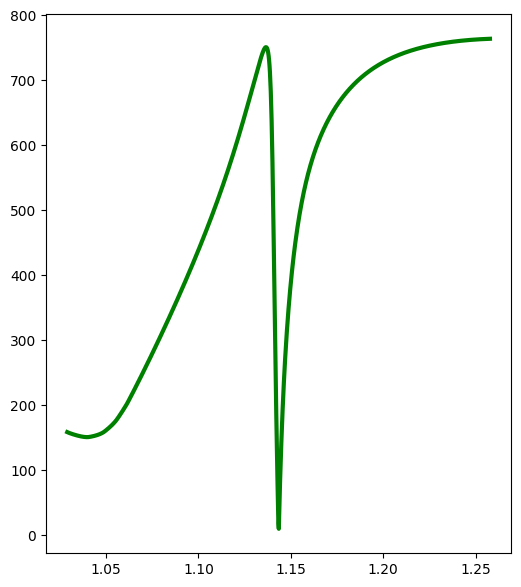

In [35]:
fig, ax = plt.subplots(figsize=(6,7))
ax.plot(dm_seq, D_dm, color = "green", label = "b", linewidth = 3) 

# Now try with dp1

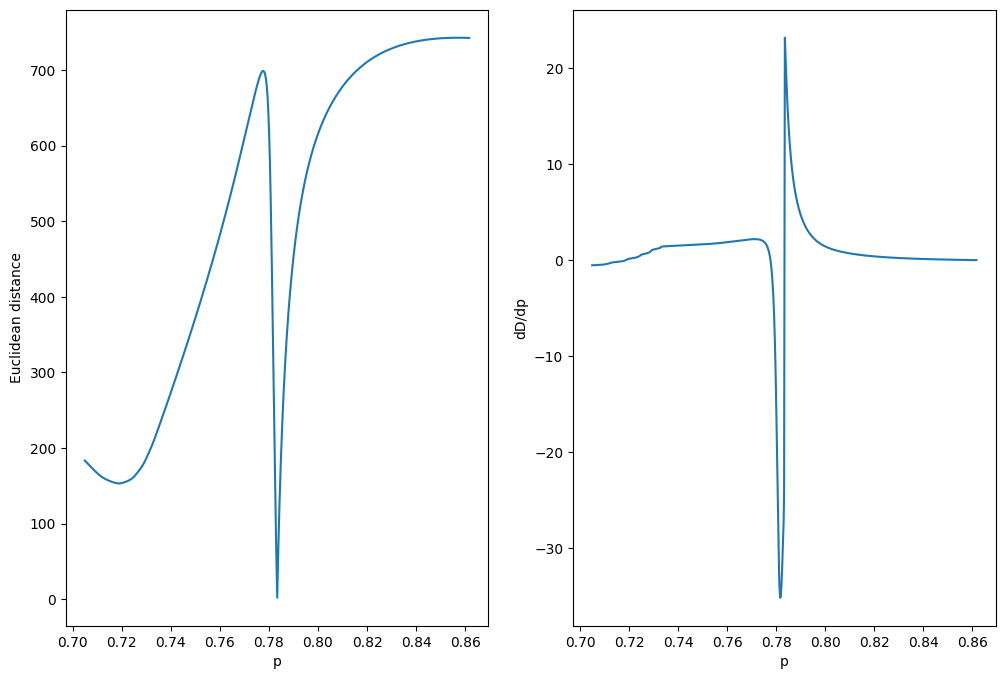

In [36]:
#The only thing we need to change is where the parameter is in param space! And distance function if we want!

def plots_sensitivity():
    datapoints = 1000 # How many steps in parameter space we have taken
    p_seq = np.linspace(0.70497, 0.86163, datapoints) #Change depending on parameter, 10%
    D_p = []
    p_collect = []
    for i in range(np.size(p_seq)):
        ########################################
        p_params = np.array([
                    246.96291990024542, 246.96291990024542, 246.96291990024542,
                    24.78485282457379, 24.78485282457379, 24.78485282457379,
                    0.024884149937163258, 0.024884149937163258, 0.024884149937163258,
                    5, 5, 5,
                    33.82307682700831, 33.82307682700831, 33.82307682700831,
                    1.143402097500176, 1.143402097500176, 1.143402097500176,
                    p_seq[i], 0.7833664565550977, 0.7833664565550977
                    ]) #Need to change this! In this case k1
        ########################################
        p_collect.append(p_params)
        data_p = solve_ode(p_params, t)
        dist = euclidean_distance_multiple_trajectories(true_data, data_p) #Can also change the distance function
        D_p.append(dist)

    step_size = np.array([100,500,1000]) #Steps to take right and left, the higher 
                                        #the number, the closer to the true value, here 1%, 0.1%, 0.02% of true value

    #To get indices we sample:
    indices_array = []
    for i in step_size:
        indices_array.append(np.array([datapoints//i, -datapoints//i])) #How many steps do we record?

    #To get the ks that correspond to the indices we sample, and create useful arrays:
    min_ind = int(min_val_ind(D_p))
    global lowestD_p
    lowestD_p = p_seq[min_ind]
    global lowestD
    lowestD = D_p[min_ind]
    p_array = np.array([p_seq, D_p])
    grad = np.gradient(p_array) #Could also do np.diff, same result
    dDdp = grad[1][1]
    array_p_eval = []
    array_D_eval = []
    dD_array = []
    for i in indices_array:
        upperp = min_ind + i[0]
        lowerp = min_ind - i[0]
        array_p_eval.append(np.array([p_seq[int(upperp)], p_seq[int(lowerp)]])) #Save parameters
        array_D_eval.append(np.array([D_p[int(upperp)], D_p[int(lowerp)]])) #Same for distance
        dD_array.append(np.array([dDdp[int(upperp)], dDdp[int(lowerp)]])) #Same for derivative

    
    fig, axs = plt.subplots(1, 2, figsize=(12, 8))
    axs = axs.flatten()
    axs[0].plot(p_seq, D_p)
    axs[0].set_ylabel("Euclidean distance")
    axs[0].set_xlabel("p")
    axs[1].plot(p_seq, dDdp)
    axs[1].set_ylabel("dD/dp")
    axs[1].set_xlabel("p")

    return p_seq, D_p, dDdp, array_p_eval, array_D_eval #It returns where it is being evaluated!

def calc_sens_metric(array_p_eval, array_D_eval):
    p_raw = []
    D_raw = []
    for i in array_p_eval:  # Get raw arrays for metric calculation
        p_raw.append(i[0])
        p_raw.append(i[1])
    for i in array_D_eval:  # Get raw arrays for metric calculation
        D_raw.append(i[0])
        D_raw.append(i[1])
    deltaD = []
    deltap = []
    for p in p_raw:
        deltap.append(np.abs(p) - np.abs(lowestD_p))
    for D in D_raw:
        deltaD.append(np.abs(D) - np.abs(lowestD))
    metric = []
    for i in range(len(deltaD)):
        metric.append(np.abs(deltaD[i]) / np.abs(deltap[i]))
    result_sense = np.log(np.mean(metric))
    return result_sense

dp_seq, D_dp, dDddp, array_p_eval_dp, array_D_eval_dp = plots_sensitivity()

In [37]:
calc_sens_metric(array_p_eval_dp, array_D_eval_dp)

11.917769609795926

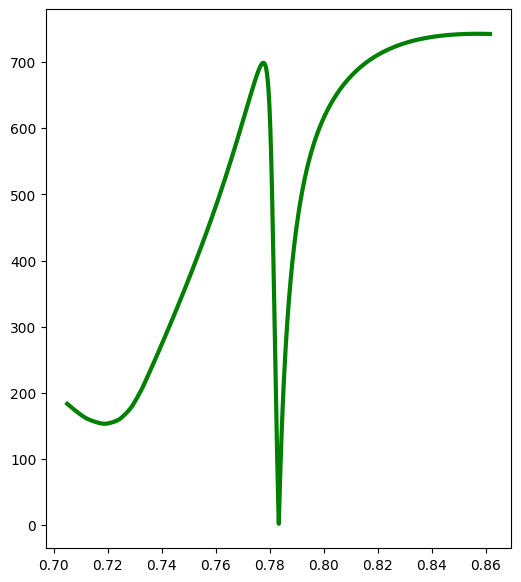

In [38]:
fig, ax = plt.subplots(figsize=(6,7))
ax.plot(dp_seq, D_dp, color = "green", label = "dp", linewidth = 3) 

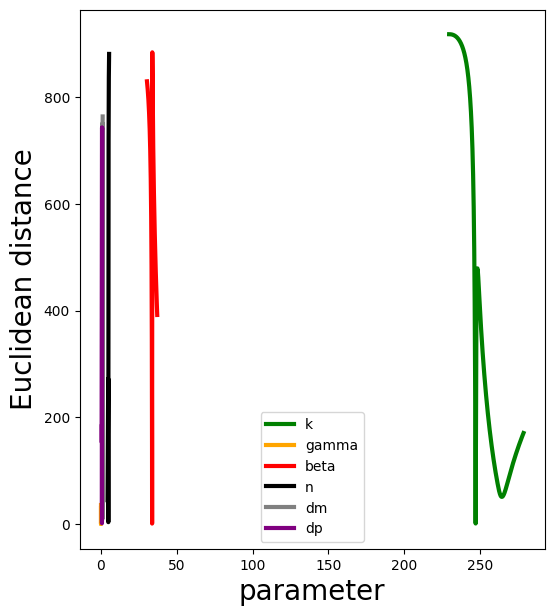

In [39]:
fig, ax = plt.subplots(figsize=(6,7))
ax.plot(k_seq, D_k, color = "green", label = "k", linewidth = 3) 
ax.plot(g_seq, D_g, color = "orange", label = "gamma", linewidth = 3) 
ax.plot(b_seq, D_b, color = "red", label = "beta", linewidth = 3) 
ax.plot(n_seq, D_n, color = "black", label = "n", linewidth = 3) 
ax.plot(dm_seq, D_dm, color = "gray", label = "dm", linewidth = 3) 
ax.plot(dp_seq, D_dp, color = "purple", label = "dp", linewidth = 3) 
ax.set_xlabel('parameter', fontsize = 20) 
ax.set_ylabel('Euclidean distance', fontsize = 20) 
plt.legend()
plt.show()

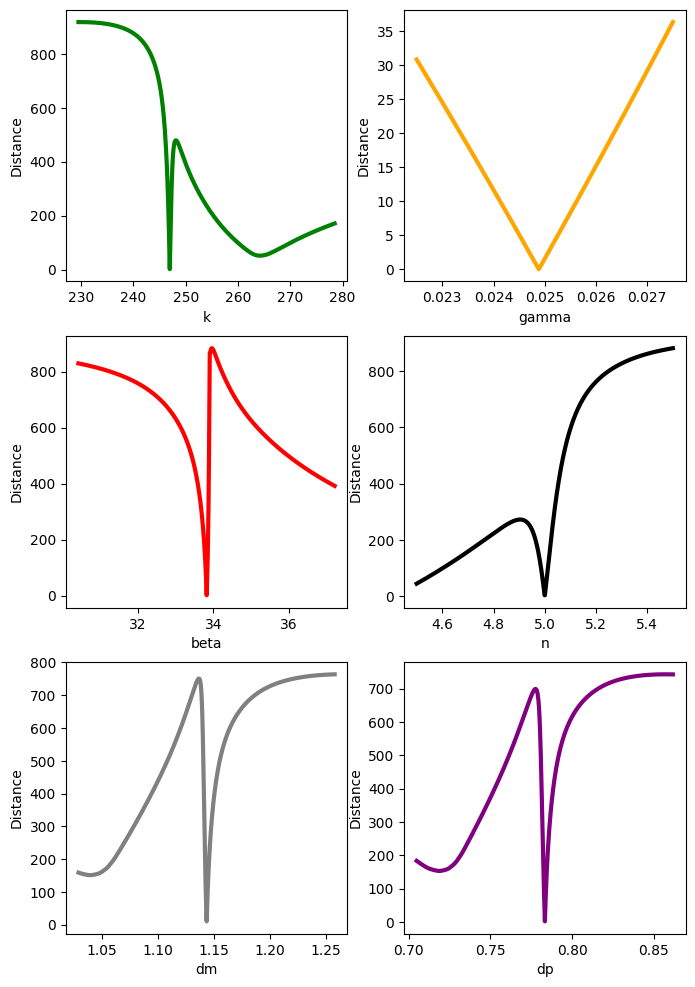

In [43]:
fig, axs = plt.subplots(3, 2, figsize=(8, 12))
axs = axs.flatten()

variable_labels = ["k", "gamma", "beta", "n", "dm", "dp"]
axs[0].plot(k_seq, D_k, color = "green", label = "k", linewidth = 3) 
axs[1].plot(g_seq, D_g, color = "orange", label = "gamma", linewidth = 3) 
axs[2].plot(b_seq, D_b, color = "red", label = "beta", linewidth = 3) 
axs[3].plot(n_seq, D_n, color = "black", label = "n", linewidth = 3) 
axs[4].plot(dm_seq, D_dm, color = "gray", label = "dm", linewidth = 3) 
axs[5].plot(dp_seq, D_dp, color = "purple", label = "dp", linewidth = 3) 
for i in range(6):
    axs[i].set_xlabel(variable_labels[i])
    axs[i].set_ylabel("Distance")

plt.show()